# Scraping, Analyzing, and Visualizing Stock Data

There are two key factors that influence a stock's performance: the profitability of the underlying company and how investors value that profitability. An earnings report can tell you about the profitability part but not the value that investors place on those profits. One way to determine a stock's value is by comparing its share price to the company's earnings, a measurement known as the price-to-earnings ratio (or P/E for short).

## How to analyze a stock using the P/E ratio
As a result of all this, companies and industry groups generating the same level of earnings per share can be awarded very different P/E ratios. For example, two companies may both report earnings of <span>$2 per share but the stock trading at </span> &#36;20 <span>a share has a P/E ratio of 10 while the other trading at</span> &#36;30 a share has a P/E of 15.

This can be due in part to the consistency of earnings, the anticipation for increased earnings, and the industry group that each stock is in. If investors are excited about the prospects for a given company, they may be willing to accept a higher P/E ratio in order to buy its shares. On the other end of the spectrum, if investors feel that future earnings will be underwhelming, a stock's P/E ratio may languish at a relatively low level.

The key is to look at whether the current P/E ratio for the stock of a given company is presently "high" or "low." The tricky part is that there are arbitrary cutoff levels that qualify as "high" or "low." The best way to assess a company's P/E ratio is by:
1. Comparing the company's current P/E to its historical P/E range
2. If appropriate, comparing the company's current P/E to that of similar companies in the same business or industry group

In [1]:
from IPython.core.display import HTML
HTML("""
<style>
@import url("https://fonts.googleapis.com/css2?family=Raleway&family=Roboto:ital,wght@0,500;0,900;1,500&display=swap");
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
    horizontal-align: middle;
}
h1 {
    display: inline-block;
    text-align: center;
    padding: 30px;
    margin: 0;
    background: linear-gradient(0deg, blue, green 40%, red);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    width: 90%;
    font-family: Raleway;
    border-radius: 5px;
}

h2 {
    display: inline-block;
    text-align: center;
    padding: 25px;
    margin: 0;
    background: linear-gradient(0deg, blue, green 40%, red);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    width: 90%;
    font-family: Raleway;
    border-radius: 5px;
}

h3 {
    display: inline-block;
    text-align: center;
    padding: 20px;
    margin: 0;
    background: linear-gradient(0deg, blue, green 40%, red);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    width: 90%;
    font-family: Raleway;
    border-radius: 5px;
}


body, p, ul, li {
    font-family: Raleway;
    font-size: 15px;
    color: charcoal;
}
div {
    font-size: 14px;
    margin: 0;

}

h4 {
    padding: 0px;
    margin: 0;
    font-family: Raleway;
    font-size: 20px;
    background: linear-gradient(to right, #30CFD0 0%, #121FCF 100%);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
}
</style>
""")

In [2]:
!pip install selenium # install selenium for web scraping

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 43.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 384.9/384.9 kB 29.4 MB/s eta 0:00:00


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from selenium import webdriver # Selenium, webdriver to scrap dynamic website
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current sessio

In [4]:
# install google chrome
!wget https://dl.google.com/linux/linux_signing_key.pub
!sudo apt-key add linux_signing_key.pub
!echo 'deb [arch=amd64] http://dl.google.com/linux/chrome/deb/ stable main' >> /etc/apt/sources.list.d/google-chrome.list
!sudo apt-get -y update
!sudo apt-get install -y google-chrome-stable

# install chromedriver
# !apt-get install -y qq unzip
!wget -O /tmp/chromedriver.zip http://chromedriver.storage.googleapis.com/`curl -sS chromedriver.storage.googleapis.com/LATEST_RELEASE`/chromedriver_linux64.zip
!unzip /tmp/chromedriver.zip chromedriver -d /usr/local/bin/

--2023-06-04 17:48:02--  https://dl.google.com/linux/linux_signing_key.pub
Resolving dl.google.com (dl.google.com)... 172.217.218.91, 172.217.218.93, 172.217.218.136, ...
Connecting to dl.google.com (dl.google.com)|172.217.218.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14605 (14K) [application/octet-stream]
Saving to: ‘linux_signing_key.pub’

linux_signing_key.p 100%[===================>]  14.26K  --.-KB/s    in 0s      

2023-06-04 17:48:02 (55.1 MB/s) - ‘linux_signing_key.pub’ saved [14605/14605]

OK
Get:1 http://dl.google.com/linux/chrome/deb stable InRelease [1825 B]
Hit:2 http://archive.ubuntu.com/ubuntu focal InRelease
Get:3 http://packages.cloud.google.com/apt gcsfuse-focal InRelease [5002 B]
Get:4 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:5 https://packages.cloud.google.com/apt cloud-sdk InRelease [6361 B]
Get:6 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:7 http://dl.google.com/linux/chrom

In [5]:
# To check Google Chrome's version
!google-chrome --version

# To check Chrome Driver's version
!chromedriver -v

Google Chrome 114.0.5735.90 
ChromeDriver 114.0.5735.90 (386bc09e8f4f2e025eddae123f36f6263096ae49-refs/branch-heads/5735@{#1052})


In [6]:
import time
from selenium import webdriver
# URL Stock Data
url = "https://www.set.or.th/th/market/index/set100/overview"

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--headless')
chrome_options.add_argument('--disable-gpu')
chrome_options.add_argument('--disable-dev-shm-usage')
chrome_options.add_argument("--window-size=1920,1080")
driver = webdriver.Chrome(options=chrome_options)
driver.get(url)

# Open Page Source
data = driver.page_source

In [7]:
# Get Data from driver
df = pd.read_html(data)[1]
df.head()

,หลักทรัพย์ (Click to sort Ascending),เปิด (Click to sort Ascending),สูงสุด (Click to sort Ascending),ต่ำสุด (Click to sort Ascending),ล่าสุด (Click to sort Ascending),เปลี่ยนแปลง (Click to sort Ascending),% เปลี่ยนแปลง (Click to sort Ascending),เสนอซื้อ (Click to sort Ascending),เสนอขาย (Click to sort Ascending),ปริมาณ (หุ้น) (Click to sort Ascending),มูลค่า ('000 บาท) (Click to sort Ascending)
0,AAV,2.80,2.86,2.78,2.86,0.06,2.14,2.84,2.86,67441177,190395.94
1,ACE,1.92,1.96,1.92,1.94,0.03,1.57,1.94,1.95,19168863,37106.42
2,ADVANC,210.00,213.00,208.00,212.00,2.00,0.95,212.00,213.00,4179460,880017.85
3,AMATA,22.70,22.90,22.70,22.80,0.10,0.44,22.80,22.90,4409038,100550.31
4,AOT,71.00,71.25,70.75,70.75,0.00,0.00,70.75,71.00,19024759,1349503.74


In [8]:
# Fix the column to easy to read and use it.
clean_column = []
for c in df.columns:
    clean_column.append(c.replace('  (Click to sort Ascending)',''))
    
df.columns = clean_column
df.head()

,หลักทรัพย์,เปิด,สูงสุด,ต่ำสุด,ล่าสุด,เปลี่ยนแปลง,% เปลี่ยนแปลง,เสนอซื้อ,เสนอขาย,ปริมาณ (หุ้น),มูลค่า ('000 บาท)
0,AAV,2.80,2.86,2.78,2.86,0.06,2.14,2.84,2.86,67441177,190395.94
1,ACE,1.92,1.96,1.92,1.94,0.03,1.57,1.94,1.95,19168863,37106.42
2,ADVANC,210.00,213.00,208.00,212.00,2.00,0.95,212.00,213.00,4179460,880017.85
3,AMATA,22.70,22.90,22.70,22.80,0.10,0.44,22.80,22.90,4409038,100550.31
4,AOT,71.00,71.25,70.75,70.75,0.00,0.00,70.75,71.00,19024759,1349503.74


In [9]:
# Set new index
df = df.set_index('หลักทรัพย์')
df.head()

,เปิด,สูงสุด,ต่ำสุด,ล่าสุด,เปลี่ยนแปลง,% เปลี่ยนแปลง,เสนอซื้อ,เสนอขาย,ปริมาณ (หุ้น),มูลค่า ('000 บาท)
หลักทรัพย์,,,,,,,,,,
AAV,2.80,2.86,2.78,2.86,0.06,2.14,2.84,2.86,67441177,190395.94
ACE,1.92,1.96,1.92,1.94,0.03,1.57,1.94,1.95,19168863,37106.42
ADVANC,210.00,213.00,208.00,212.00,2.00,0.95,212.00,213.00,4179460,880017.85
AMATA,22.70,22.90,22.70,22.80,0.10,0.44,22.80,22.90,4409038,100550.31
AOT,71.00,71.25,70.75,70.75,0.00,0.00,70.75,71.00,19024759,1349503.74


In [10]:
# Make link from stock name to scrape each stock data
stock = df.index[0]
stock

'AAV'

In [11]:
# Create url link for all stock
url = 'https://www.set.or.th/th/market/product/stock/quote/' + stock + '/financial-statement/company-highlights'
url

'https://www.set.or.th/th/market/product/stock/quote/AAV/financial-statement/company-highlights'

# Create Function to collect balance sheet and stock statistic data

Once I get the stock information, I scrape the 2 table detail: Balance Sheet and Stock Statistic then collect both table to all_stock_dict variable.

In [12]:
def get_stock_data(stock, driver, all_stock_dict):
    stock = stock.split()[0]
    url = 'https://www.set.or.th/th/market/product/stock/quote/' + stock + '/financial-statement/company-highlights'
    driver.get(url)
    stock_data = driver.page_source
    a_df = pd.read_html(stock_data)[0]
    b_df = pd.read_html(stock_data)[1]
    all_stock_dict[stock] = [a_df, b_df]
    return driver, all_stock_dict

In [13]:
all_stock_dict = dict()
for stock in df.index:
    driver, all_stock_dict = get_stock_data(stock, driver, all_stock_dict) 

In [14]:
for key in all_stock_dict.keys():
    stock_df = all_stock_dict[key]
    stock_df[0].set_index('งวดงบการเงิน ณ วันที่', inplace=True)
    stock_df[1].set_index('ค่าสถิติสำคัญ ณ วันที่', inplace=True)

# Analyze stock using P/E Ratio

The price to earnings ratio (P/E) is one of the most widely used metrics for investors and analysts to determine stock valuation. It shows whether a company's stock price is overvalued or undervalued and can reveal how a stock's valuation compares to its industry group or a benchmark.

The P/E ratio helps investors determine the market value of a stock as compared to the company's earnings. It shows what the market is willing to pay for a stock based on its past or future earnings.

Companies that grow faster than average, such as technology companies, typically have higher P/Es. A higher P/E ratio shows that investors are willing to pay a higher share price now due to growth expectations in the future.

Investors not only use the P/E ratio to determine a stock's market value but also in determining future earnings growth. Investors might expect the company to increase its dividends as a result if earnings are expected to rise. Higher earnings and rising dividends typically lead to a higher stock price.

# Extract the P/E Ratio from the table

Using iteration by for loop to get the P/E Ratio from latest information. In the for loop, I use error handling to prevent null value.

In [15]:
n_df = 1
pe = 'P/E (เท่า)'

focus_output = dict()

for key in all_stock_dict.keys():
    try:
        selected_data = all_stock_dict[key][n_df][all_stock_dict[key][1].columns[-1]][pe]
        focus_output[key] = float(selected_data)
    except KeyError:
        pass
    except ValueError:
        pass

In [16]:
len(focus_output)

89

In [17]:
focus_df = pd.DataFrame([focus_output])
focus_df

,ACE,ADVANC,AMATA,AP,AWC,BAM,BANPU,BBL,BCH,BCP,...,THANI,THG,TIDLOR,TIPH,TISCO,TOP,TQM,TTB,TU,WHA
0,15.84,23.83,11.5,6.32,33.72,12.91,1.99,9.69,36.09,4.18,...,11.21,45.47,20.75,21.53,10.7,3.31,22.96,10.57,10.0,17.11


In [18]:
focus_df = focus_df.transpose()

In [19]:
focus_df.columns = ['p/e']

In [20]:
focus_df_sorted = focus_df.sort_values(by='p/e')
focus_df_sorted

,p/e
RCL,1.13
BANPU,1.99
TOP,3.31
PSL,4.05
BCP,4.18
...,...
CENTEL,62.40
DOHOME,72.78
DELTA,76.33
GPSC,96.43


# Display Thai font in Matplotlib

In [21]:
import matplotlib as mpl
import matplotlib.font_manager as fm

!wget https://github.com/google/fonts/raw/main/ofl/prompt/Prompt-Regular.ttf
mpl.font_manager.fontManager.addfont('Prompt-Regular.ttf')
mpl.rc('font', family='Prompt')

--2023-06-04 17:53:43--  https://github.com/google/fonts/raw/main/ofl/prompt/Prompt-Regular.ttf
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/google/fonts/main/ofl/prompt/Prompt-Regular.ttf [following]
--2023-06-04 17:53:43--  https://raw.githubusercontent.com/google/fonts/main/ofl/prompt/Prompt-Regular.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168932 (165K) [application/octet-stream]
Saving to: ‘Prompt-Regular.ttf’

Prompt-Regular.ttf  100%[===================>] 164.97K  --.-KB/s    in 0.008s  

2023-06-04 17:53:43 (19.3 MB/s) - ‘Prompt-Regular.ttf’ saved [168932/168932]



## Sort the P/E Ratio to easy to read

In [22]:
focus_df_sorted.dtypes

p/e    float64
dtype: object

# Filter P/E Ratio less than 15

Visualize P/E Ratio using bar plot.

In [23]:
# Filter Focus for P/E less than 15
focus_df_sorted = focus_df_sorted[focus_df_sorted['p/e'] <= 15]

<Axes: title={'center': 'วิเคราะห์ด้วย P/E น้อยกว่า 15'}>

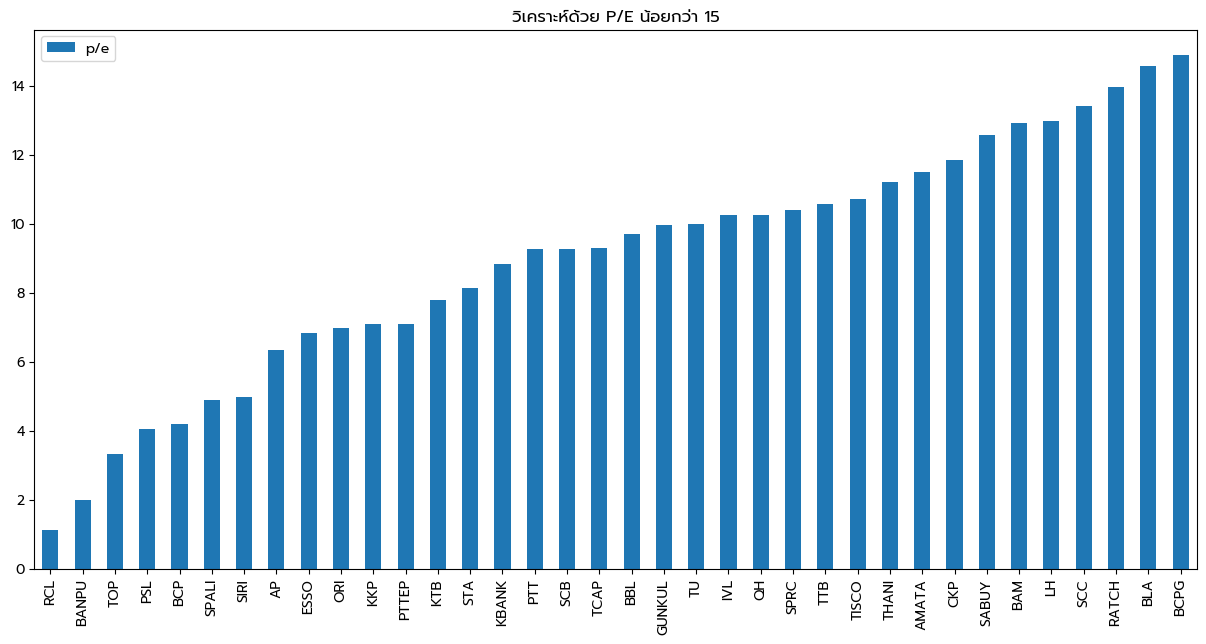

In [24]:
focus_df_sorted.plot(kind='bar', figsize=(15,7), title='วิเคราะห์ด้วย P/E น้อยกว่า 15')